In [2]:
import pandas as pd

all_stock_df = pd.read_pickle('000016_2006-01-01_2024-12-31_base.pickle')
all_stock_label_df = pd.read_pickle('000016_2006-01-01_2024-12-31_label.pickle')


In [3]:
all_stock_sample_df = all_stock_df.merge(all_stock_label_df, on=['code', 'datetime'])

In [6]:
# all_stock_sample_df.columns
# pe_ttm	ps_ttm	pcf_ncf_ttm	pb_mrq	industry	season

# 进行基本的数据清理
import numpy as np
stock_df = all_stock_sample_df.copy()[full_feature_columns + ['code', 'datetime', 'code_name']]
base_indicator_cols = ["pe_ttm", "ps_ttm", "pcf_ncf_ttm", "pb_mrq"]
stock_df[base_indicator_cols] = stock_df[base_indicator_cols].replace("", np.NaN).ffill()
stock_df = stock_df.replace([np.inf, -np.inf], np.nan)
stock_df = stock_df.dropna(axis=1, how='all') # 过滤特征列全为空的column
stock_df = stock_df.dropna() # 剔除包含空值的行

# stock_df['pe_ttm'] = stock_df['pe_ttm'].fillna('-1').replace('','-1').astype(float)
# stock_df['ps_ttm'] = stock_df['ps_ttm'].fillna('-1').replace('','-1').astype(float)
# stock_df['pcf_ncf_ttm'] = stock_df['pcf_ncf_ttm'].fillna('-1').replace('','-1').astype(float)
# stock_df['pb_mrq'] = stock_df['pb_mrq'].fillna('-1').replace('','-1').astype(float)
stock_df['industry'] = stock_df['industry'].astype('category').cat.codes
stock_df['season'] = stock_df['season'].astype('category').cat.codes
stock_df

,turnover_rate,pe_ttm,ps_ttm,pcf_ncf_ttm,pb_mrq,alpha_184_1,alpha_184_2,alpha_184_3,alpha_184_4,alpha_184_5,...,alpha_184_181,alpha_184_182,alpha_184_183,alpha_184_184,industry,season,label,code,datetime,code_name
60,1.9443,11.243832,0.556595,-168.734261,2.062783,-0.009637,0.027037,-0.356455,0.015455,0.571612,...,-0.147712,0.060281,0.025232,0.017514,4,1,0.175425,sh.600028,2006-04-07,中国石化
61,2.1070,11.199997,0.554425,-168.076428,2.054741,-0.003910,0.021444,-0.182339,0.000000,0.000000,...,-0.179954,0.073002,-0.023638,0.024647,4,1,0.272030,sh.600028,2006-04-10,中国石化
62,2.6825,11.199997,0.554425,-168.076428,2.054741,0.000000,0.017620,0.000000,0.007833,0.444555,...,0.016916,0.135868,0.063918,0.029511,4,1,0.279863,sh.600028,2006-04-11,中国石化
63,1.7716,11.287668,0.558765,-169.392094,2.070825,0.009806,0.019595,0.500450,0.005873,0.299730,...,-0.299112,-0.018227,0.043591,-0.005205,4,1,0.262143,sh.600028,2006-04-12,中国石化
64,1.6699,11.156161,0.552255,-167.418594,2.046699,-0.011650,0.017483,-0.666334,0.000000,0.000000,...,-0.044335,0.024609,0.014338,0.004393,4,1,0.304517,sh.600028,2006-04-13,中国石化
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170952,1.1363,67.916088,7.238532,-76.829263,2.298963,-0.021615,0.049881,-0.433333,0.011876,0.238095,...,0.164285,0.012945,-0.149219,-0.000200,13,1,0.024278,sh.688981,2024-04-11,中芯国际
170953,1.0325,66.498078,7.087400,-75.225156,2.250963,-0.016821,0.027791,-0.605263,0.010483,0.377193,...,0.100669,-0.036165,-0.133835,-0.000324,13,1,0.086784,sh.688981,2024-04-12,中芯国际
170954,1.0984,67.916088,7.238532,-76.829263,2.298963,0.021324,0.038185,0.558442,0.008926,0.233766,...,0.137049,0.011883,-0.201838,0.018710,13,1,0.059480,sh.688981,2024-04-15,中芯国际
170955,0.9387,67.899599,7.236775,-76.810611,2.298405,0.004390,0.026585,0.165138,0.016829,0.633028,...,0.042176,0.022196,-0.131081,0.001858,13,1,0.059981,sh.688981,2024-04-16,中芯国际


In [5]:
# 初始化基础信息
benchmark = '000016'  # 对比指数 = 上证50
train_val_test_period = {
    'train': ['2006-01-01', '2016-12-31'],
    'val': ['2017-01-01', '2018-12-31'],
    'test': ['2019-01-01', '2024-12-31']
}

base_common_cols = ["code", "datetime", "open", "high", "low", "close", "volume", "amount", "turnover_rate", "vwap", "returns", "code_name", "in_date", "out_date", "type", "status", "industry", "pe_ttm", "ps_ttm", "pcf_ncf_ttm", "pb_mrq", "weekday", "day_of_week", "day_of_month", "month", "season"]
base_alpha_184_cols = [f"alpha_184_{i+1}" for i in range(184)]
base_alpha_184_cols = [f"alpha_184_{i+1}" for i in range(184)]
base_alpha_184_cols.remove('alpha_184_30')
base_alpha_184_cols.remove('alpha_184_31')
base_alpha_184_cols.remove('alpha_184_32')
base_alpha_184_cols.remove('alpha_184_33')
base_alpha_184_cols.remove('alpha_184_34')
base_alpha_101_cols = [f"alpha_101_{i+1}" for i in range(101)]
base_alpha_191_cols = [f"alpha_191_{i+1}" for i in range(191)]
base_label_cols = ["label"]

feature_config = {
    "target_features": ['label'],
    "numeric_features": ['turnover_rate', 'pe_ttm', 'ps_ttm', 'pcf_ncf_ttm', 'pb_mrq'] + base_alpha_184_cols,
    "string_categorical_features": ['industry', 'season'],
}

feature_columns = feature_config.get('numeric_features', []) + feature_config.get('integer_categorical_features', []) + feature_config.get('string_categorical_features', [])
label_columns = feature_config.get('target_features', [])
full_feature_columns = feature_columns + label_columns

In [7]:
def extract_train_val_data(df, train_start_date, train_end_date, val_start_date, val_end_date, test_start_date, test_end_date):
    train_start_date = pd.to_datetime(train_start_date)
    train_end_date = pd.to_datetime(train_end_date)
    val_start_date = pd.to_datetime(val_start_date)
    val_end_date = pd.to_datetime(val_end_date)
    test_start_date = pd.to_datetime(test_start_date)
    test_end_date = pd.to_datetime(test_end_date)

    train_data = df[(pd.to_datetime(df['datetime']) >= train_start_date) & (pd.to_datetime(df['datetime']) <= train_end_date)]
    val_data = df[(pd.to_datetime(df['datetime']) >= val_start_date) & (pd.to_datetime(df['datetime']) <= val_end_date)]
    test_data = df[(pd.to_datetime(df['datetime']) >= test_start_date) & (pd.to_datetime(df['datetime']) <= test_end_date)]

    print(f"train_data_size: {train_data.shape}")
    print(f"validation_data_size: {val_data.shape}")
    print(f"test_data_size: {test_data.shape}")
    return train_data, val_data, test_data

In [8]:
print("开始拆分训练、验证、测试集合...")
train_data, val_data, test_data = extract_train_val_data(
    stock_df,
    train_val_test_period['train'][0],train_val_test_period['train'][1],
    train_val_test_period['val'][0],train_val_test_period['val'][1],
    train_val_test_period['test'][0],train_val_test_period['test'][1],
)

开始拆分训练、验证、测试集合...
train_data_size: (57523, 190)
validation_data_size: (18461, 190)
test_data_size: (59602, 190)


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, RobustScaler


class QuantileClipTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, lower_quantile=0.01, upper_quantile=0.99):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile
        
    def fit(self, X, y=None):
        # 计算给定分位数的分界值
        self.lower_bound_ = np.nanquantile(X, self.lower_quantile, axis=0)
        self.upper_bound_ = np.nanquantile(X, self.upper_quantile, axis=0)
        return self
    
    def transform(self, X, y=None):
        # 对整个数组应用剪辑操作
        return np.clip(X, self.lower_bound_, self.upper_bound_)

    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X, y).transform(X)

In [11]:
train_data_shuffle = train_data.sample(frac=1, random_state=13)
train_x = train_data_shuffle[feature_columns]
train_y = train_data_shuffle[label_columns]

val_x = val_data[feature_columns]
val_y = val_data[label_columns]

test_x = test_data[feature_columns]
test_y = test_data[label_columns]

In [55]:
# train_data_shuffle
val_data

,turnover_rate,pe_ttm,ps_ttm,pcf_ncf_ttm,pb_mrq,alpha_184_1,alpha_184_2,alpha_184_3,alpha_184_4,alpha_184_5,...,alpha_184_181,alpha_184_182,alpha_184_183,alpha_184_184,industry,season,label,code,datetime,code_name
2632,0.1076,18.802209,0.361598,28.056625,0.963031,0.016603,0.022141,0.749895,0.001846,0.083368,...,-0.019822,-0.164930,-0.006279,0.000941,4,3,0.110720,sh.600028,2017-01-03,中国石化
2633,0.1055,19.006951,0.365536,28.362141,0.973518,0.016421,0.023724,0.692189,0.003651,0.153906,...,-0.103700,-0.069096,-0.040605,0.008174,4,3,0.120285,sh.600028,2017-01-04,中国石化
2634,0.2498,19.621180,0.377348,29.278692,1.004978,0.036034,0.048652,0.740644,0.010816,0.222305,...,0.023405,0.112339,0.050037,0.069163,4,3,0.055659,sh.600028,2017-01-05,中国石化
2635,0.3439,20.030665,0.385223,29.889725,1.025952,0.015569,0.046716,0.333271,0.024223,0.518525,...,0.226891,0.215578,0.121105,0.095884,4,3,0.013635,sh.600028,2017-01-06,中国石化
2636,0.2181,19.996541,0.384567,29.838806,1.024204,-0.001704,0.034069,-0.050025,0.027261,0.800151,...,0.063470,0.024207,0.051438,0.052133,4,3,0.017072,sh.600028,2017-01-09,中国石化
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166244,2.9035,44.911997,9.258736,-42.550988,11.098413,-0.007222,0.055417,-0.130328,0.006945,0.125314,...,0.076204,-0.006888,0.046828,-0.018184,13,0,0.007695,sh.603986,2018-10-17,兆易创新
166245,1.8263,43.504570,8.968591,-41.217549,10.750617,-0.031202,0.047013,-0.663691,0.000420,0.008926,...,-0.007189,-0.007832,0.008520,-0.034442,13,0,0.063980,sh.603986,2018-10-18,兆易创新
166246,3.7688,44.359079,9.144750,-42.027137,10.961778,0.049658,0.086381,0.574866,0.010407,0.120483,...,0.200232,-0.005446,0.054116,0.023484,13,0,0.013456,sh.603986,2018-10-19,兆易创新
166247,3.7897,47.777116,9.849388,-45.265488,11.806425,0.066480,0.088780,0.748815,0.015989,0.180094,...,0.146336,0.094771,0.086235,0.015574,13,0,-0.168201,sh.603986,2018-10-22,兆易创新


In [12]:
print("开始对特征进行预处理...")
feature_preprocess_pipeline = Pipeline(steps=[
    ('robust_scaler', RobustScaler()),
    ('minmax_scaler', MinMaxScaler()),
])
preprocess_feature_columns = feature_config.get('numeric_features', [])
train_x[preprocess_feature_columns] = feature_preprocess_pipeline.fit_transform(train_x[preprocess_feature_columns])
val_x[preprocess_feature_columns] = feature_preprocess_pipeline.transform(val_x[preprocess_feature_columns])
test_x[preprocess_feature_columns] = feature_preprocess_pipeline.transform(test_x[preprocess_feature_columns])

print("开始对标签进行预处理...")
label_preprocess_pipeline = Pipeline(steps=[
    ('quantile_clipper', QuantileClipTransformer()),
    ('robust_scaler', RobustScaler()),
    ('minmax_scaler', MinMaxScaler()),
])
preprocess_target_columns = feature_config.get('target_features', [])
train_y[preprocess_target_columns] = label_preprocess_pipeline.fit_transform(train_y[preprocess_target_columns])
val_y[preprocess_target_columns] = label_preprocess_pipeline.transform(val_y[preprocess_target_columns])
test_y[preprocess_target_columns] = label_preprocess_pipeline.transform(test_y[preprocess_target_columns])

开始对特征进行预处理...


/tmp/ipykernel_63856/1043855455.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x[preprocess_feature_columns] = feature_preprocess_pipeline.fit_transform(train_x[preprocess_feature_columns])
/tmp/ipykernel_63856/1043855455.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_x[preprocess_feature_columns] = feature_preprocess_pipeline.transform(val_x[preprocess_feature_columns])


开始对标签进行预处理...


/tmp/ipykernel_63856/1043855455.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x[preprocess_feature_columns] = feature_preprocess_pipeline.transform(test_x[preprocess_feature_columns])
/tmp/ipykernel_63856/1043855455.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y[preprocess_target_columns] = label_preprocess_pipeline.fit_transform(train_y[preprocess_target_columns])
/tmp/ipykernel_63856/1043855455.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [14]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# 转换为LightGBM数据集格式
train_ds = lgb.Dataset(train_x, label=train_y, categorical_feature=feature_config.get('string_categorical_features', []))  # 指定类别特征的索引
val_ds = lgb.Dataset(val_x, label=val_y, reference=train_ds)
test_ds = lgb.Dataset(test_x, label=test_y, reference=train_ds)

# 定义参数
params = {
    'objective': 'huber',
    'metric': 'huber,mae',
    'num_leaves': 45,
    'learning_rate': 0.1,
    'max_depth': 6,
    'alpha':0.13,
    'feature_fraction':0.8
}
eval_dict = {}

# 训练模型
model = lgb.train(params, train_ds, valid_sets=[train_ds, val_ds], num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(), lgb.record_evaluation(eval_dict)])

# 使用训练好的模型进行预测
test_valid = val_y['label'].notna()
y_pred = model.predict(val_x[test_valid], num_iteration=model.best_iteration)

# 评估模型性能

mse = mean_squared_error(val_y[test_valid], y_pred)
print('Huber Error:', mse)



[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1


LightGBMError: GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

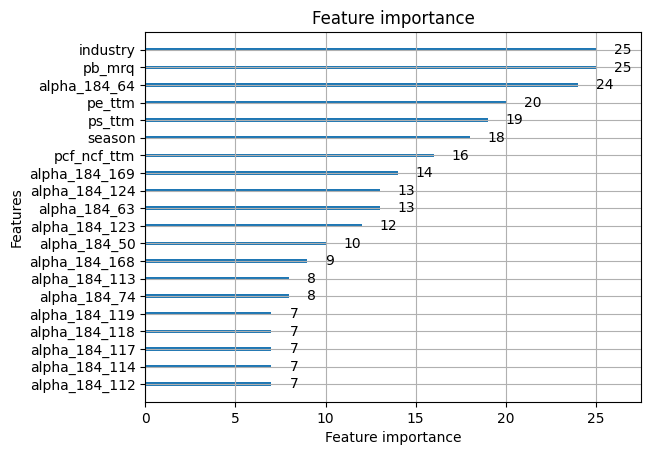

In [45]:
lgb.plot_importance(model, max_num_features=20)
# model.num_trees()

In [46]:
test_valid = test_y['label'].notna()
y_pred = model.predict(test_x[test_valid], num_iteration=model.best_iteration)

# 评估模型性能

mse = mean_squared_error(test_y[test_valid], y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.012865601228074593


In [49]:
# val_y[test_valid]
# test_y[test_valid]
y_pred
# train_y
# eval_dict
# model.best_iteration

array([ 0.01980862,  0.01631705,  0.01631705, ..., -0.00027988,
       -0.00027988,  0.00300533])

In [52]:
print("开始保存回测预测结果...")
model_pred_result = model.predict(test_x)
output_df = test_data[['code', 'datetime', 'code_name']]
output_df['label'] = test_y['label']
output_df['label_pred'] = model_pred_result
output_df = output_df.rename(columns={
    'code': 'stock_code',
    'code_name': 'stock_name'
})
test_start_date='2019-01-01'
output_df.to_pickle(f'../../Offline/backtest/backtest_data/test/{benchmark}_{test_start_date}_回归任务_lgb_v1.pkl') 
# output_df[10:30]


开始保存回测预测结果...


/tmp/ipykernel_40360/4251723911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df['label'] = test_y['label']
/tmp/ipykernel_40360/4251723911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df['label_pred'] = model_pred_result


In [53]:
output_df

,stock_code,datetime,stock_name,label,label_pred
3119,sh.600028,2019-01-02,中国石化,0.099801,0.019809
3120,sh.600028,2019-01-03,中国石化,0.099216,0.016317
3121,sh.600028,2019-01-04,中国石化,0.090198,0.016317
3122,sh.600028,2019-01-07,中国石化,0.083016,0.012523
3123,sh.600028,2019-01-08,中国石化,0.080155,0.010466
...,...,...,...,...,...
170952,sh.688981,2024-04-11,中芯国际,0.024278,0.004311
170953,sh.688981,2024-04-12,中芯国际,0.086784,0.004311
170954,sh.688981,2024-04-15,中芯国际,0.059480,-0.000280
170955,sh.688981,2024-04-16,中芯国际,0.059981,-0.000280
